In [9]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from utils import data_clean_and_analysis,gmm

# data clean and analysis

In [14]:
train,test,argu = data_clean_and_analysis.get_data()

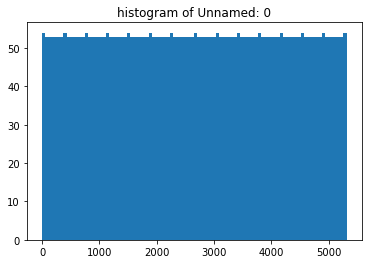

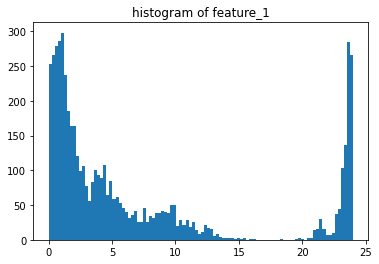

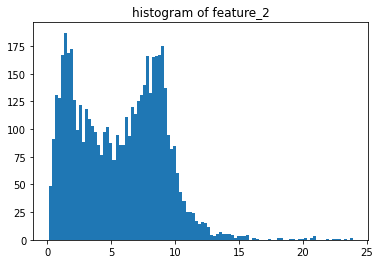

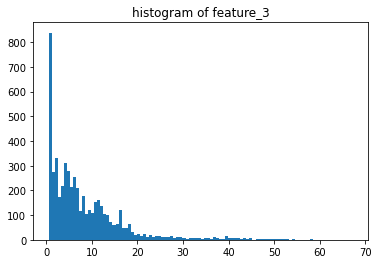

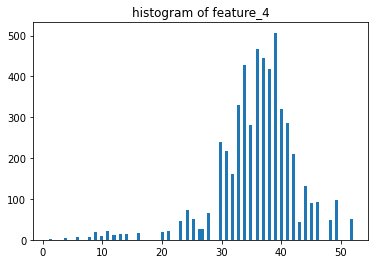

In [15]:
data_clean_and_analysis.histogram(argu)

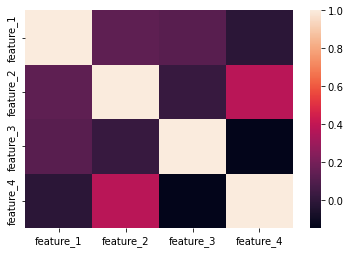

In [16]:
data_clean_and_analysis.heatmap(test)

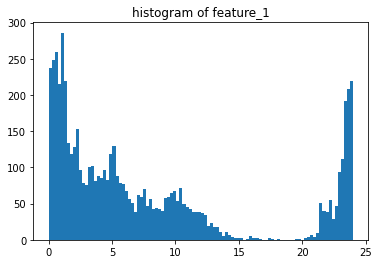

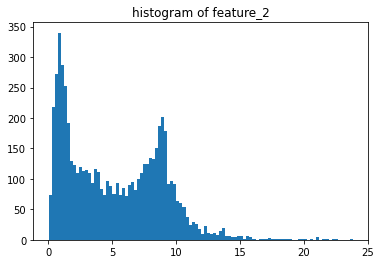

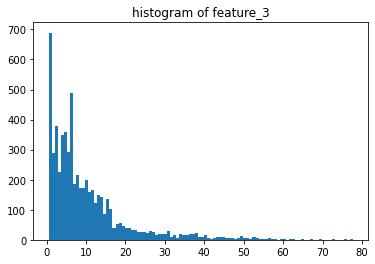

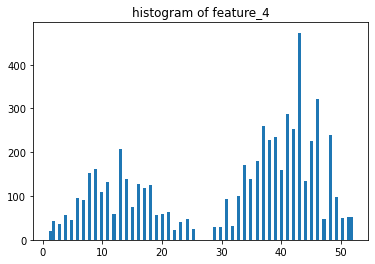

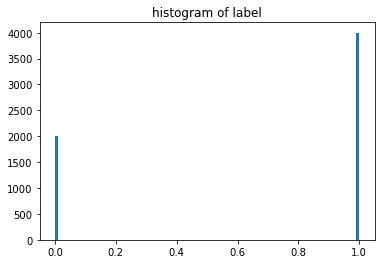

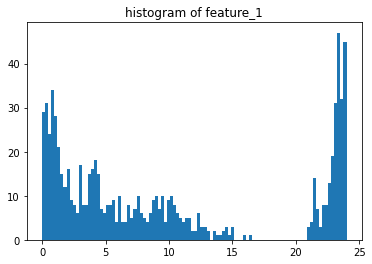

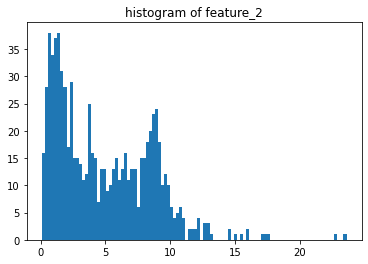

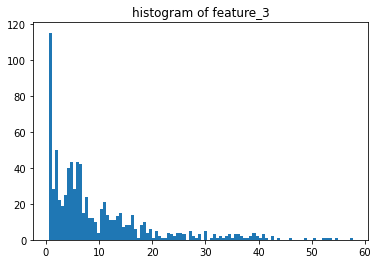

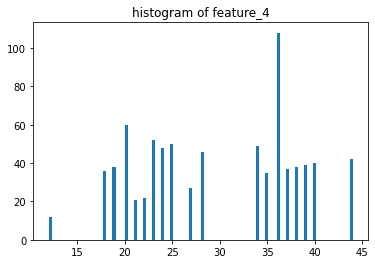

In [11]:
data_clean_and_analysis.histogram(train)
data_clean_and_analysis.histogram(test)

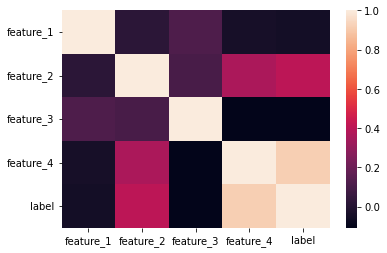

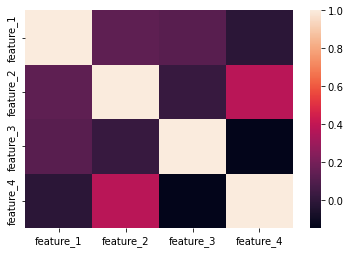

In [14]:
data_clean_and_analysis.heatmap(train)
data_clean_and_analysis.heatmap(test)

# ML ALGORITHM

## GMM

In [77]:
train_data = pd.DataFrame(train.iloc[:,3])
test_data = pd.DataFrame(test.iloc[:,3])

In [78]:
#1. use feature4 
#1.1 - test data
gmm.i_gmm(test_data,test_data,normal=True)
#normal = false之后就可以和normal=true比了:没区别
gmm.i_gmm(test_data,test_data,normal=False)

(800, 1.0)

In [79]:
#1. use feature4 
#1.1 - train data
#normal = true:居然一样
print(gmm.i_gmm(train_data,test_data,normal=True))
#normal = false
print(gmm.i_gmm(train_data,test_data,normal=False))

(800, 1.0)
(727, 0.90875)


In [80]:
# 2. 用全部feature
# 2.1 - test data
print(gmm.i_gmm(test,test,normal=True))
#normal = false
print(gmm.i_gmm(test,test,normal=False))

(366, 0.4575)
(431, 0.53875)


In [93]:
# 2. 用全部feature
train_data = train.iloc[:,:-1]
#不一定收敛到合适的点
print(gmm.i_gmm(train_data,test,normal=True))
#normal = false
print(gmm.i_gmm(train_data,test,normal=False))

(14, 0.0175)
(746, 0.9325)


尝试：先用3个feature去训练，第四个feature做修正 - 

In [ ]:
# feature1
train_data = pd.DataFrame(train.iloc[:,0])
test_data = pd.DataFrame(test.iloc[:,0])
print(gmm.i_gmm(train_data,test_data,normal=True))

In [95]:
tmp = pd.read_csv('./output_record/submission_luca.csv')
data_clean_and_analysis.result_comparition(tmp.iloc[:,1].values)

(0, 0.0)

# 底下是没整理的垃圾！！！！

### draw the plot of gmm

In [126]:
colors = ["navy", "turquoise"]
tmp = pd.read_csv('tmp.csv').iloc[:,1]
#test_minmax['useless_feature'] = np.zeros(len(tmp))
#test_minmax['predicted_y'] = predicted
test['useless_feature'] = np.zeros(len(tmp))
test['predicted'] = predicted
#test_matrix = test_minmax.values
test_matrix = test.iloc[:,3:6].values
test_matrix


array([[19.,  0.,  1.],
       [23.,  0.,  1.],
       [34.,  0.,  0.],
       ...,
       [39.,  0.,  0.],
       [20.,  0.,  1.],
       [36.,  0.,  0.]])

388
412


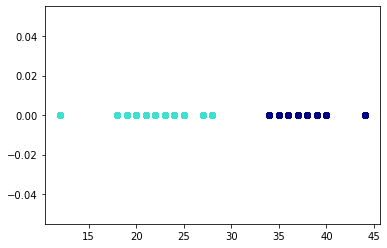

In [128]:
for i, color in enumerate(colors):
        data = test_matrix[test_matrix[:,2] == i][:,0:2]
        print(len(data))
        plt.scatter(data[:, 0], data[:, 1], color=color)

## K-means

In [48]:
X = train.iloc[:,:-1]
Y = train.iloc[:,-1]
kmea = KMeans(n_clusters=2)
kmea.fit(X)
predicted = kmea.predict(test)
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = predicted
predicted_df.to_csv('./submission2.csv', index=False)
#90.05%

In [99]:
train_data, val_data = train_test_split(train, test_size=0.1)
X = train_data.iloc[:,3].values.reshape(-1,1)
Y = train.iloc[:,-1].values
kmea.fit(X)
predicted = kmea.predict(val_data.iloc[:,3].values.reshape(-1,1))
gt_y = val_data.iloc[:,-1]
print(np.sum(predicted-gt_y))
test_predict = kmea.predict(test.iloc[:,3].values.reshape(-1,1))
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = test_predict
predicted_df.to_csv('./submission.csv', index=False)

-11


In [ ]:
X = test.values.reshape(-1,1)
kmea.fit(X)
predicted = kmea.predict()
test_predict = kmea.predict(test.iloc[:,3].values.reshape(-1,1))
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = test_predict
predicted_df.to_csv('./submission.csv', index=False)

## Kmeans one feature

In [ ]:
train_data, val_data = train_test_split(train, test_size=0.2)
X = train_data.iloc[:,4]

In [58]:
df1 = pd.read_csv('submission.csv').iloc[:,1].values
df2 = pd.read_csv('submission1.csv').iloc[:,1].values
np.sum(df2-df1)

-244

# SVM